In [2]:
from scipy.optimize import root, curve_fit
from scipy.integrate import odeint
from scipy import stats
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.core.fromnumeric import mean, std
import xlsxwriter
import os
from scipy.stats import sem
from fpdf import FPDF

In [3]:
#Read file 

name_group = 'HFRW_24months' # SELECT: LFAL_6months, LFRW_6months, HFAL_6months, HFRW_6months
                            # SELECT: LFAL_12months, LFRW_12months, HFAL_12months, HFRW_12months
                            # SELECT: LFAL_18months, LFRW_18months, HFAL_18months, HFRW_18months
                            # SELECT: LFAL_24months, LFRW_24months, HFAL_24months, HFRW_24months

data_unl = pd.read_excel('glucose concentration (fiona).xlsx', name_group)
data_lab = pd.read_excel('tracer concentration (fiona).xlsx', name_group)

t1 = data_unl['Time (min)'].to_numpy()
average_data_unl = data_unl['average'].to_numpy()

#Ctrl + / comments a full region of the code
#datafile (lab or unl) is a matrix containing all mice in the LFAL_6months group and all time points
#Each row is a different mouse, and each column a timepoint
#datafile[[0]][[0]] gives first row, [[1]][[0]] second row and so on

# datafile_ins[0] access first line of matrix
# datafile_ins[:,0] access first column of matrix

matrix_unl = np.array(data_unl)
datafile_unl = np.delete(matrix_unl, [0,1],1)
datafile_unl = datafile_unl.T

matrix_lab = np.array(data_lab)
datafile_lab = np.delete(matrix_lab, [0,1],1)
datafile_lab = datafile_lab.T

8


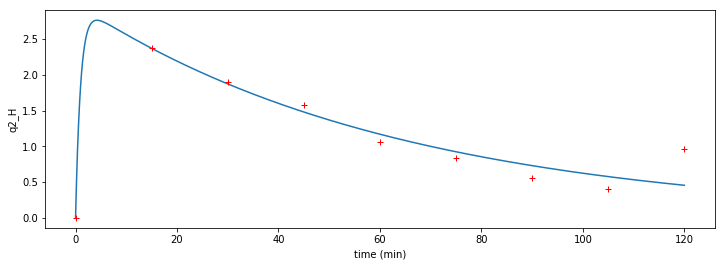

433.85519505377806
C1= 2.9973208052603555
ka = 0.9999846637514967
ke= 0.015689664294521916


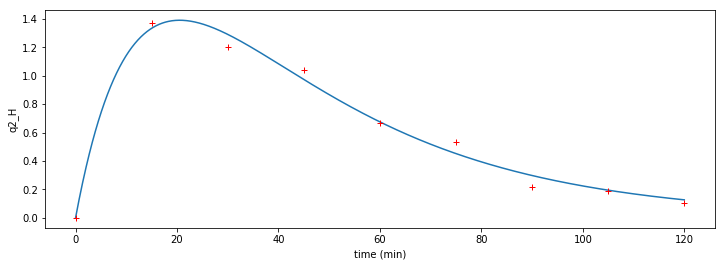

510.47477438716516
C1= 4.025984865767152
ka = 0.07628561163551122
ke= 0.02877329807556366


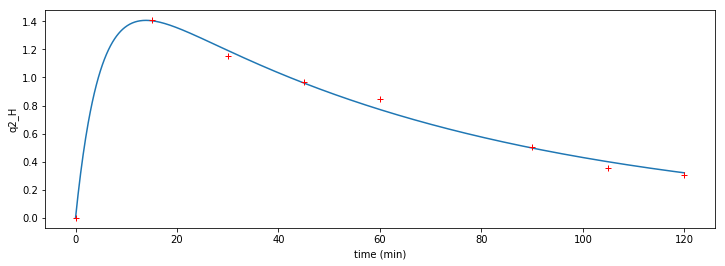

743.2787422849844
C1= 1.8542529912282664
ka = 0.2050823996282834
ke= 0.014616312637389321


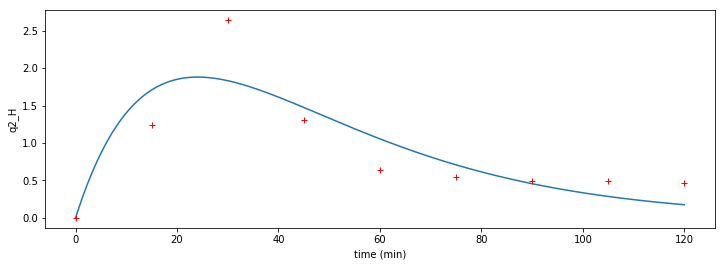

266.6968422077086
C1= 39.9999991644123
ka = 0.044251574503584155
ke= 0.03894198627609137


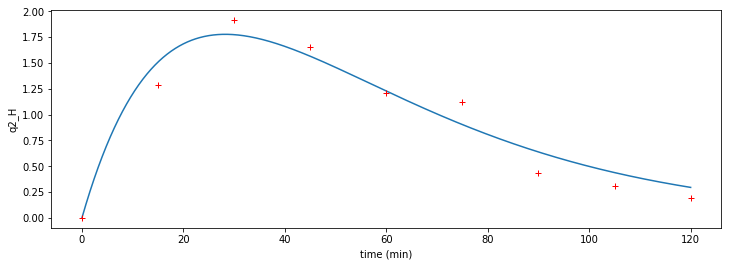

281.0749462968306
C1= 39.99999999999999
ka = 0.037574934570087225
ke= 0.033297079421186856


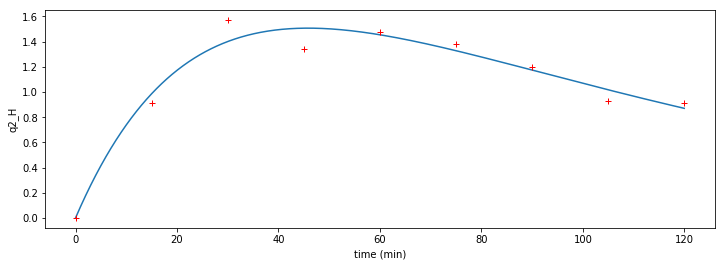

483.1431159633342
C1= 4.06648841716996
ka = 0.03529481658469173
ke= 0.012300232244378954


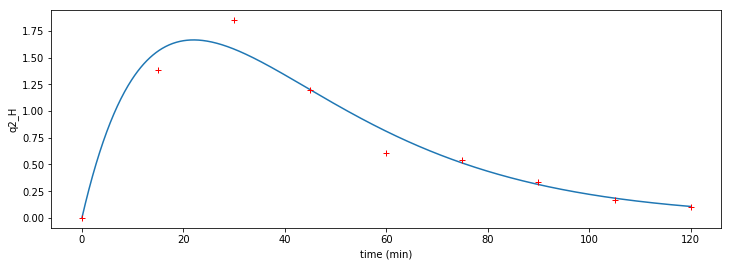

298.85391262477515
C1= 39.999997332456104
ka = 0.04802371533058494
ke= 0.04288154074914491


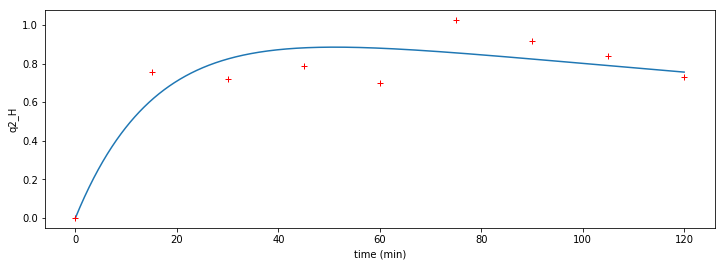

1240.8017211688434
C1= 1.083766303012922
ka = 0.062315009763508955
ke= 0.0030000000000000005


In [15]:
#Fitting of labelled curve and parameter estimation

def One_Elimination(x, C1, ka, ke):
    return C1*(-np.exp(-ka*x) + np.exp(-ke*x))

            
results_lab = []

n=np.shape(datafile_lab)[0] #size of the array
# n=1 #selection n=1 if interested only in simulating the average data for the group

print(n)

for i in range(0,n):
    t2 = np.linspace(0, 120, 1201)

    # remove any nan in the tracer data
    if np.isnan(datafile_lab[[i][0]]).any():
        nan_index = np.where(np.isnan(datafile_lab[[i][0]]))
        y_values = np.delete(datafile_lab[[i][0]],nan_index)
        x_values = np.delete(t1,nan_index)
    else:
        y_values = datafile_lab[[i][0]]
        x_values = t1

    #Initial guess for parameters
    C1_=4
    ka_=0.1
    ke_=0.03
    
    # For eaverage:
    # popt,cov = curve_fit(One_Elimination, x_values, y_values)
    # For all groups
    popt,cov = curve_fit(One_Elimination, x_values, y_values, p0=[C1_, ka_, ke_], bounds=([0.1*C1_,0.1*ka_,0.1*ke_],[10*C1_,10*ka_,10*ke_]), maxfev=100000)
    
    fig, (ax1) = plt.subplots(1, figsize=(12, 4))

    # Time course
    ax1.plot(t2, One_Elimination(t2, *popt))
    ax1.plot(x_values, y_values, 'r+')
    ax1.set_xlabel("time (min)")
    ax1.set_ylabel("q2_H")

    plt.show()

    C1 = popt[0]
    ka = popt[1]
    ke = popt[2]
    
    Vol = -(0.8*1600/C1)*ka/(ke-ka)
    print(Vol)

    print ('C1=', C1)
    print ('ka =', ka)
    print ('ke=', ke)
    
    export=popt
    results_lab.append(export)


8
[  0  15  30  45  60  75  90 105 120]
[ 8.9        15.72743047 12.29528955 14.02502847 12.64600177 14.96655962
 13.73821772 14.49651486 13.83908777]


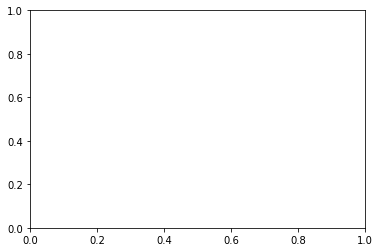

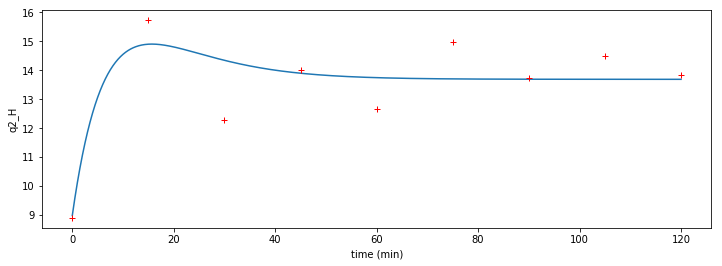

C0= 13.686898330108225
C1= -279.9999999991082
C2= 275.2963058590776
ka = 0.10999999999999997
ke= 0.10738291292279156
[  0  15  30  45  60  75  90 105 120]
[ 6.5        11.83324697  8.19660429  8.96207952  9.83578755  8.86337357
  9.88561938 10.60769113 10.49391421]


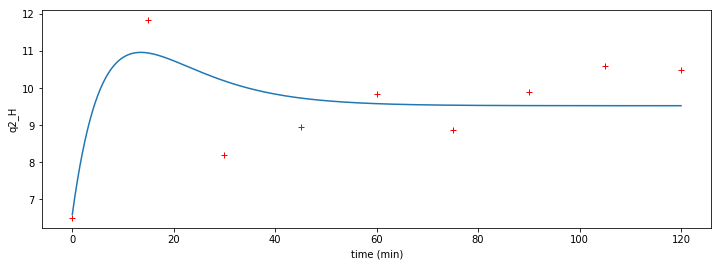

C0= 9.52704511067933
C1= -279.9999999990578
C2= 277.0639460466648
ka = 0.10999999999999997
ke= 0.10755758649339348
[  0  15  30  45  60  75  90 105 120]
[11.         15.89297081 11.94516182 12.73439012 14.55711478 11.99630632
 12.79711967 13.04496908 12.69565888]


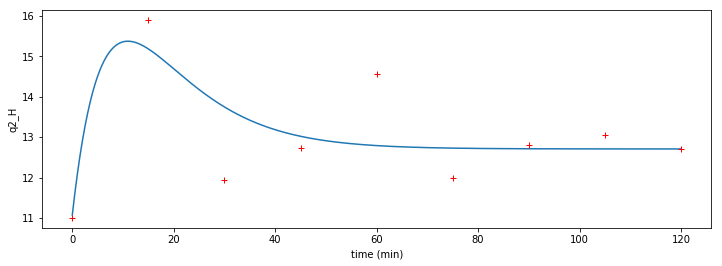

C0= 12.70681491018993
C1= -279.9999999695984
C2= 278.36353273079663
ka = 0.10999999999999997
ke= 0.10660834615000409
[  0  15  30  45  60  75  90 105 120]
[ 8.8        11.06517     7.76225802 11.78875955 10.06218071 12.9516748
 19.11262845 20.71199593 24.03340201]


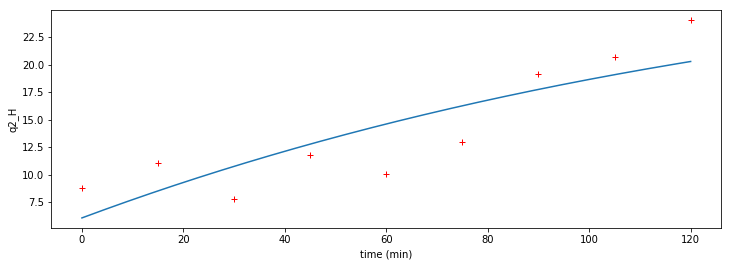

C0= 19.999999999999996
C1= -279.9999997776844
C2= 266.06025822957747
ka = 0.00393906700163823
ke= 0.003500000000000001
[  0  15  30  45  60  75  90 105 120]
[10.2        11.5115723  13.68626208 14.54467101 12.79496086 13.08223697
 12.06701271 13.99331628 13.60869674]


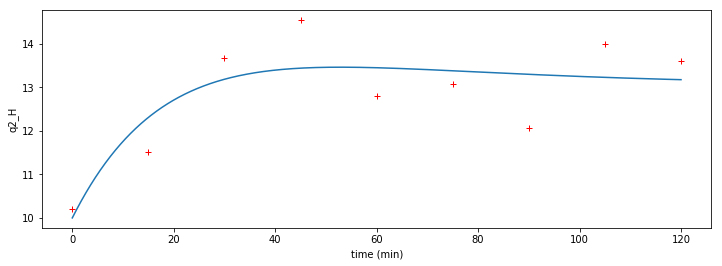

C0= 13.07007197194666
C1= -35.95454920106119
C2= 32.88447759670468
ka = 0.03998305703631793
ke= 0.03664725643846141
[  0  15  30  45  60  75  90 105 120]
[11.7        18.18730488 20.02975353 16.95666436 18.32248121 19.21571486
 19.99990538 17.07315888 18.78594127]


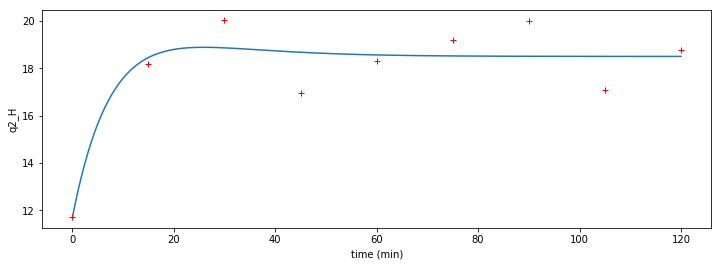

C0= 18.50130300388764
C1= -279.9960303176989
C2= 273.17428671966354
ka = 0.09654683944779134
ke= 0.09495140182314919
[  0  15  30  45  60  75  90 105 120]
[ 9.7        15.51610458 13.15018469 13.00364894 13.49540572 14.35592116
 15.76075836 16.63028079 14.90160197]


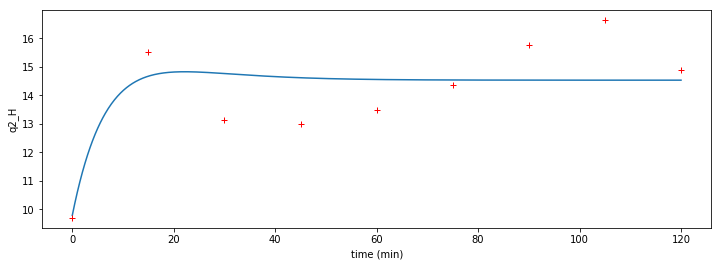

C0= 14.529184656109061
C1= -279.9999996459345
C2= 275.2612298160769
ka = 0.10999999999999997
ke= 0.10868857121226444
[  0  15  30  45  60  75  90 105 120]
[ 8.5        15.14604505 13.78129629 12.61436384 11.9987441  11.77573276
 11.18532386 10.56345647 10.66748038]


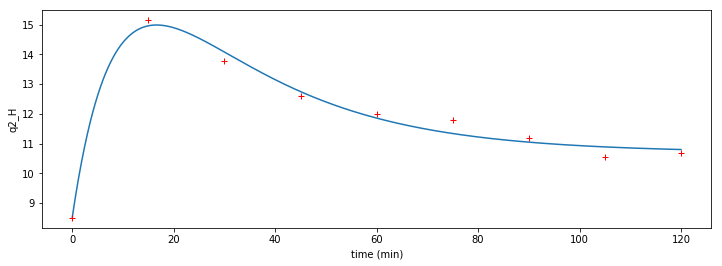

C0= 10.692937833611017
C1= -15.345410657864583
C2= 13.17676555730079
ka = 0.10999999999999997
ke= 0.04016382581748279


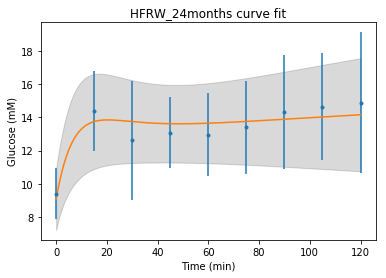

In [216]:
#Fitting of unlabelled curve and parameter estimation

def Two_Elimination(x, C0, C1, C2, ka, ke):
    return C0+ C1*np.exp(-ka*x) + C2* np.exp(-ke*x)


results_unl = []

n=np.shape(datafile_lab)[0] #size of the array
# n=1 #selection n=1 if interested only in simulating the average data for the group

print(n)

average_fit_unl = []

# create a pdf file that contains all the parameters and the curve fits
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 20, '%s animal parameters and curves (unlabeled)' %name_group, 0, 1,align='C')
pdf.set_font('Arial', 'B', 12)
pdf.cell(0, 10, 'General parameters', 0, 1)
pdf.set_font('Arial', '', 12)
pdf.cell(0, 10, 'C0_initial = 2 (%s - %s)' %(0.1*2,10*2) , 0, 1)
pdf.cell(0, 10, 'C1_initial = -28 (%s - %s)' %(10*-28,0.1*-28) , 0, 1)
pdf.cell(0, 10, 'C2_initial = 60 (%s - %s)' %(0.1*60,10*60) , 0, 1)
pdf.cell(0, 10, 'ka_initial = 0.011 (%s - %s)' %(0.1*0.011,10*0.011), 0, 1)
pdf.cell(0, 10, 'ke_initial = 0.035 (%s - %s)' %(0.1*0.035,10*0.035), 0, 1)

# create a figure that will show all curve fits
fig2,ax = plt.subplots(1)

for i in range(0,n):
    x_values = t1
    y_values = datafile_unl[[i][0]]
    t2 = np.linspace(0, 120, 1201)

    print(x_values)
    print(y_values)

    # Initial guesses for the parameters
    C0_ = 2
    C1_ = -28
    C2_ = 60
    ka_ = 0.011
    ke_ = 0.035


    # For average:
    # popt,cov = curve_fit(Two_Elimination, x_values, y_values, p0=[C0_, C1_, C2_, ka_, ke_], maxfev=100000)
    # For all groups
    popt,cov = curve_fit(Two_Elimination, x_values, y_values, p0=[C0_, C1_, C2_, ka_, ke_], bounds=([0.1*C0_,10*C1_,0.1*C2_,0.1*ka_,0.1*ke_],[10*C0_, 0.1*C1_,10*C2_,10*ka_,10*ke_]), maxfev=100000)
    fig, (ax1) = plt.subplots(1, figsize=(12, 4))

    # Time course
    ax1.plot(t2, Two_Elimination(t2, *popt))
    ax1.plot(t1, y_values, 'r+')
    ax1.set_xlabel("time (min)")
    ax1.set_ylabel("q2_H")

    plt.show()

    C0 = popt[0]
    C1 = popt[1]
    C2 = popt[2]
    ka = popt[3]
    ke = popt[4]

    print ('C0=', C0)
    print ('C1=', C1)
    print ('C2=', C2)
    print ('ka =', ka)
    print ('ke=', ke)
    
    export=popt
    results_unl.append(export)
    
    # export the plots in png file
    fig.savefig('curve fit %s.png' %i)
    
    # add the parameters and the curve fits for each animal in a pdf file
    pdf.set_font('Arial', 'B', 12)
    pdf.cell(60, 10, 'Parameters for animal %s' %(i+1), 0, 1,)
    pdf.set_font('Arial', '', 12)
    pdf.cell(60, 10, 'C0  = %s' %C0, 0, 1)
    pdf.cell(60, 10, 'C1  = %s' %C1, 0, 1)
    pdf.cell(60, 10, 'C2  = %s' %C2, 0, 1)
    pdf.cell(60, 10, 'ka  = %s' %ka, 0, 1)
    pdf.cell(60, 10, 'ke = %s' %ke, 0, 1)
    pdf.image('curve fit %s.png' %i,x=30,w =150)
    
    # remove the plot
    os.remove('curve fit %s.png' %i)
    
    average_fit_unl.append(Two_Elimination(t2, C0, C1, C2, ka, ke))
    
    # plot the fits on one figure
    ax.plot(t2, Two_Elimination(t2, *popt),label='animal %s' %(i+1))
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Glucose (mM)')
    ax.legend(bbox_to_anchor=(0.5,1.05), loc='center',ncol=n,fontsize= 'xx-small')
    fig2.savefig('%s glucose curve fits.png' %name_group, dpi=1000)


# export the pdf file
pdf.output('%s animal parameters and curves (unlabeled).pdf' %name_group, 'F')

# create a plot with the average fit and a shaded area around it representing the deviation of the fits from the average
average_fit_unl = np.array(average_fit_unl)

averages_unl = []
standard_deviations_unl = []

error_bars = []

for i in range(0,np.shape(average_fit_unl)[1]):
    averages_unl.append(mean(average_fit_unl[:,i]))
    standard_deviations_unl.append(std(average_fit_unl[:,i]))

for i in range(0,np.shape(datafile_lab)[1]):
    error_bars.append(np.nanstd(datafile_unl[:,i]))
    
averages_unl = np.array(averages_unl)
standard_deviations_unl = np.array(standard_deviations_unl)

fig1, ax = plt.subplots(1)
ax.errorbar(t1,average_data_unl,error_bars,fmt='.')
ax.plot(t2,averages_unl,'-')
ax.set_xlabel('Time (min)')
ax.set_ylabel('Glucose (mM)')
ax.set_title('%s curve fit' %name_group)

bound_lower = averages_unl - standard_deviations_unl
bound_upper = averages_unl + standard_deviations_unl

ax.fill_between(t2, bound_lower, bound_upper,
                 color = 'black', alpha = 0.15)

fig1.savefig('%s glucose curve fit.png' %name_group)


In [217]:
#Export tracer and unalbelled glucose fits
df1 = pd.DataFrame(results_lab, columns=['C1', 'ka', 'ke'])
df2 = pd.DataFrame(results_unl, columns=['C0', 'C1', 'C2','ka','ke'])

name_export = name_group+'_constants.xlsx' #incorporates selected group name in the file name

with pd.ExcelWriter(name_export) as writer:
    df1.to_excel(writer, sheet_name='labelled')
    df2.to_excel(writer, sheet_name='unlabelled')





In [218]:
# Model building for EGP calculation
t2= np.linspace(0, 120, 241)

F= 0.8

q1_lab_0 = 1600
Q1_unl_0 = 3900

EGP_matrix1 = []
EGP_matrix2 = []
Vol_matrix = []
EGP_matrix1.append(t2)
EGP_matrix2.append(t2)

n=np.shape(datafile_lab)[0] #size of the array

average_fit = []

for i in range(0,n):
    vector_lab = results_lab[[i][0]] # C1, ka, ke
    vector_unl = results_unl[[i][0]] #C0, C1, C2, ka, ke



    C1_lab = vector_lab[0]
    ka_lab = vector_lab[1]
    k2 = vector_lab[2]
    k1 = F * ka_lab
    Vol= k1*(q1_lab_0)/(-C1_lab*(k2-ka_lab))
    print('Vol (animal %s): %s' %(i+1,Vol))
    Vol_matrix.append(Vol)


    C0_unl = vector_unl[0]
    C1_unl = vector_unl[1]
    C2_unl = vector_unl[2]
    ka_unl = vector_unl[3]
    ke_unl = vector_unl[4]



    def EGP_analytical_1(t, C0_unl, C1_unl, C2_unl, ka_unl, ke_unl, k1, k2): #in µmol/(kg*min)
        part1 = ((C1_unl*Vol)*(k2-ka_unl)*np.exp(-ka_unl*t) - k1 *  Q1_unl_0*np.exp(-ka_lab*t))
        part2 = ((C2_unl*Vol)*(k2-ke_unl))*np.exp(-ke_unl*t)
        part3 = k2*C0_unl*Vol
        return part1 + part2 + part3

    

    EGP_matrix1.append(EGP_analytical_1(t2, C0_unl, C1_unl, C2_unl, ka_unl, ke_unl, k1, k2))
    EGP_mM_min=EGP_analytical_1(t2, C0_unl, C1_unl, C2_unl, ka_unl, ke_unl, k1, k2)/Vol #calculates EGP in mM/min
    EGP_matrix2.append(EGP_mM_min)
 
    
    average_fit.append(EGP_analytical_1(t2, C0_unl, C1_unl, C2_unl, ka_unl, ke_unl, k1, k2))
    
    print('C0_unl (animal %s): %s' %(i+1,C0_unl))
    print('C1_unl (animal %s): %s' %(i+1,C1_unl))
    print('C2_unl (animal %s): %s' %(i+1,C2_unl))
    print('ka_unl (animal %s): %s' %(i+1,ka_unl))
    print('ke_unl (animal %s): %s' %(i+1,ke_unl))
    print('k1 (animal %s): %s' %(i+1,k1))
    print('k2 (animal %s): %s \n' %(i+1,k2))

Vol (animal 1): 433.8551950537781
C0_unl (animal 1): 13.686898330108225
C1_unl (animal 1): -279.9999999991082
C2_unl (animal 1): 275.2963058590776
ka_unl (animal 1): 0.10999999999999997
ke_unl (animal 1): 0.10738291292279156
k1 (animal 1): 0.7999877310011975
k2 (animal 1): 0.015689664294521916 

Vol (animal 2): 510.4747743871652
C0_unl (animal 2): 9.52704511067933
C1_unl (animal 2): -279.9999999990578
C2_unl (animal 2): 277.0639460466648
ka_unl (animal 2): 0.10999999999999997
ke_unl (animal 2): 0.10755758649339348
k1 (animal 2): 0.06102848930840898
k2 (animal 2): 0.02877329807556366 

Vol (animal 3): 743.2787422849846
C0_unl (animal 3): 12.70681491018993
C1_unl (animal 3): -279.9999999695984
C2_unl (animal 3): 278.36353273079663
ka_unl (animal 3): 0.10999999999999997
ke_unl (animal 3): 0.10660834615000409
k1 (animal 3): 0.16406591970262674
k2 (animal 3): 0.014616312637389321 

Vol (animal 4): 266.6968422077086
C0_unl (animal 4): 19.999999999999996
C1_unl (animal 4): -279.9999997776844


In [219]:
#Export EGP data
df1 = pd.DataFrame(EGP_matrix1)
df2 = pd.DataFrame(EGP_matrix2)
df3 = pd.DataFrame(Vol_matrix)

name_export_EGP = name_group+'_EGP.xlsx'

with pd.ExcelWriter(name_export_EGP) as writer:
    df1.T.to_excel(writer, sheet_name='EGP in µmol-minKg')
    df2.T.to_excel(writer, sheet_name='EGP in mM-min')
    df3.to_excel(writer, sheet_name='estimated Vol')


In [220]:
#Creating simulation
#Reads results_lab and results_unl to get constants 
#For now it's reading only the first row, corresponding to the average of the group
n = 0 #a ZERO here means we're getting the first row (average), later a for loop could be added
t = t2
C_lab = results_lab[n]
C_unl = results_unl[n]

labelled = One_Elimination(t, C_lab[0], C_lab[1], C_lab[2])
unlabelled = Two_Elimination(t, C_unl[0], C_unl[1], C_unl[2], C_unl[3], C_unl[4])

EGP_input = EGP_analytical_1(t, C_unl[0], C_unl[1], C_unl[2], C_unl[3], C_unl[4], k1, k2)


In [221]:
# Initial conditions and fixed parameters for simulations

q1_lab_0 = 1600
Q1_unl_0 = 3900

F = 0.8
C1_lab = C_lab[0]
ka_lab = C_lab[1]
k2 = C_lab[2]
k1 = F * ka_lab
Vol= k1*(q1_lab_0)/(-C1_lab*(k2-ka_lab))
kL = ka_lab*(1-F)

In [222]:
# Rate equations
# v1 is defined in μmol kg-1 min-1 and v2 in mM min-1. Q1 is defined in μmol kg-1 and Q2 in mM. Rate constants k are all in min-1.


Q1_L_0 = 3900; # amount of unlabelled glucose administered in μmol kg-1
Q2_L_0 = unlabelled[0]; # initial concentration of unlabelled glucose in the plasma pool in mM; computed above from the glucose data
q1_H_0 = 1600 # amount of labelled glucose administered in μmol kg-1
q2_H_0 = 0 #initial concentration of labelled glucose in the plasma

def v1(Q1):
    return k1*Q1

def v2(Q2):
    return k2*Q2

def vL(Q1):
    return kL*Q1

def model (y, t): 
        
               
    Q1_L, Q2_L, q1_H, q2_H = y
    
    dQ1_Ldt = -v1(Q1_L) - vL(Q1_L)
    #The following line includes the analytical EGP solution in the simulation
    dQ2_Ldt = v1(Q1_L)/Vol - v2(Q2_L) # + EGP_analytical_1(t, C_unl[0], C_unl[1], C_unl[2], C_unl[3], C_unl[4], k1, k2)/Vol  #EGP in µmol/min
    dq1_Hdt = -v1(q1_H) - vL(q1_H)
    dq2_Hdt = v1(q1_H)/Vol - v2(q2_H)
   
    return dQ1_Ldt, dQ2_Ldt, dq1_Hdt, dq2_Hdt


In [223]:
#Solve ODE

y0 = (Q1_L_0, Q2_L_0, q1_H_0, q2_H_0)
y = odeint(model, y0, t2)

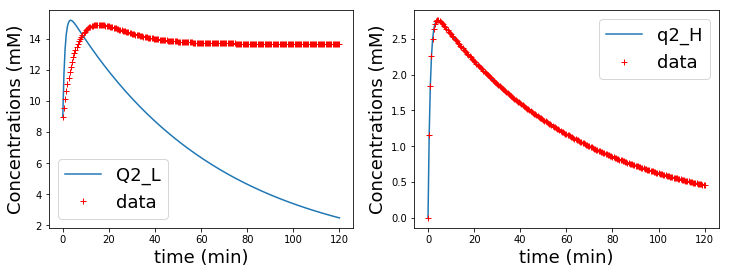

In [224]:
# Plots of solved ODE

fig, (ax3, ax4) = plt.subplots(1, 2, figsize=(12, 4))


# Time course
ax3.plot(t2, y[:,1]) #unlabelled glucose
ax3.plot(t2, unlabelled, 'r+')
ax3.set_xlabel("time (min)", fontsize = 18)
ax3.set_ylabel("Concentrations (mM)", fontsize = 18)
ax3.legend(("Q2_L", "data",), fontsize = 18)



ax4.plot(t2, y[:,3]) #labelled glucose
ax4.plot(t2, labelled, 'r+')
ax4.set_xlabel("time (min)", fontsize = 18)
ax4.set_ylabel("Concentrations (mM)", fontsize = 18)
ax4.legend(("q2_H", 'data',), fontsize = 18)


plt.savefig ("Q2andq2_fitted.png", format='png')
plt.show()


average steady-state EGP: 131.41296621091823
standard error of the average steady-state EGP: 20.80897871950186


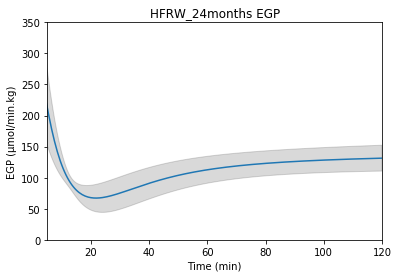

In [225]:
# create a plot with the average EGP time course and a shaded area around it representing the deviation of the animal data from the average
average_fit = np.array(average_fit)

averages = []
standard_errors = []

for i in range(0,np.shape(average_fit)[1]):
    averages.append(mean(average_fit[:,i]))
    standard_errors.append(sem(average_fit[:,i]))

    
averages = np.array(averages)
standard_errors = np.array(standard_errors)

fig2, ax = plt.subplots(1)
ax.plot(t2,averages,'-')
ax.set_xlabel('Time (min)')
ax.set_ylabel('EGP (μmol/min.kg)')
ax.set_xlim([5, 120])
ax.set_ylim([0, 350])
ax.set_title('%s EGP' %name_group)

bound_lower = averages - standard_errors
bound_upper = averages + standard_errors

ax.fill_between(t2, bound_lower, bound_upper,
                 color = 'black', alpha = 0.15)

fig2.savefig('%s EGP.png' %name_group)

# report the average steady-state EGP value
steady_state_EGP = averages[len(averages)-1]
steady_state_EGP_sem = standard_errors[len(standard_errors)-1]

print('average steady-state EGP: %s' %steady_state_EGP)
print('standard error of the average steady-state EGP: %s' %steady_state_EGP_sem)


d = {'mean': steady_state_EGP, 'standard error': steady_state_EGP_sem}

df4 = pd.DataFrame(data=d,index=[0])

if os.path.exists('average steady-state EGP data.xlsx'):
    with pd.ExcelWriter('average steady-state EGP data.xlsx',mode = 'a',engine='openpyxl') as writer:
        df4.to_excel(writer,sheet_name=name_group)
else:
    df4.to_excel('average steady-state EGP data.xlsx',sheet_name=name_group)